**Compute weights based on minimal distance from point to boundary**
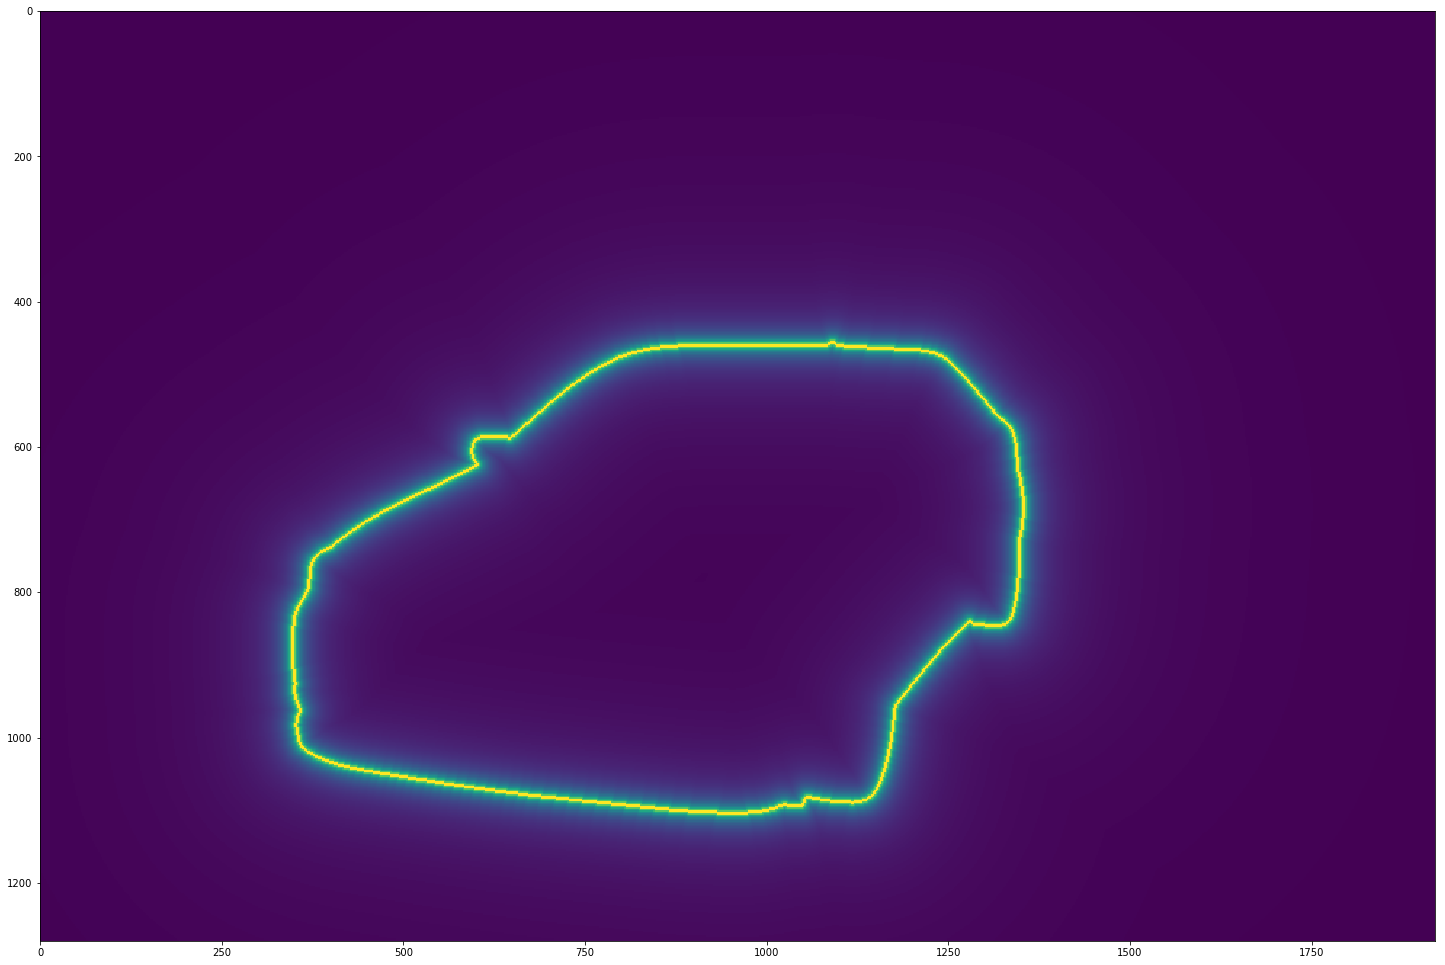

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import glob
import cv2
from scipy.spatial.distance import pdist, cdist
from PIL import Image

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will
# list the files in the input directory

masks = glob.glob("/kaggle/input/train_masks/*.gif")
for m in masks[:2]:
    mask = np.array(Image.open(m), dtype=np.uint8)
    mask = np.pad(mask, ((0, 0), (1, 1)), 'constant')
    shape = mask.shape
    mask = cv2.resize(
        mask, (shape[1] // 2, shape[0] // 2), interpolation=cv2.INTER_NEAREST)
    mask = mask.astype(np.float32)

    plt.figure(figsize=(25, 25))
    plt.imshow(mask)
    plt.show()

    border = np.abs(np.gradient(mask)[1]) + np.abs(np.gradient(mask)[0])
    border = np.select([border == 0.5, border != 0.5], [1.0, border])

    plt.figure(figsize=(25, 25))
    plt.imshow(border)
    plt.show()

    XA = []
    XB = []
    for x, y in zip(np.nonzero(border)[0], np.nonzero(border)[1]):
        XB.append((x, y))

    for x in range(0, mask.shape[0]):
        for y in range(0, mask.shape[1]):
            XA.append((x, y))

    dist_matrix = cdist(XA, XB, metric="euclidean").min(
        axis=1, keepdims=False).reshape(mask.shape)
    dist_matrix = cv2.resize(
        dist_matrix, (shape[1], shape[0]), interpolation=cv2.INTER_NEAREST)
    weights = (1.0 / (dist_matrix + 5.0))

    plt.figure(figsize=(25, 25))
    plt.imshow(weights)
    plt.show()